In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as smi
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from statistics import mean
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN, GRU, Dropout, Conv1D, MaxPooling1D, Flatten, RepeatVector
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from tensorflow.keras.optimizers import Adam, Nadam, RMSprop
from statsmodels.tsa.seasonal import seasonal_decompose
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from hyperopt import hp, Trials, fmin, tpe
import joblib
import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv(r'E:\A aPython Programms\Data1\Bank.csv')
df.tail(5)

,Date,AXISBANK,AXISVOL,BAJAJFIN,BAJAJFINVOL,BOB,BOBVOL,FEDBANK,FEDVOL,HDFC,...,KOTAK,KOTAKVOL,PNB,PNBVOL,SBI,SBIVOL,REC,RECVOL,PIRAMAL,PIRAMALVOL
3748,21-03-2024,1035.599976,9903738,6715.750000,1806092,255.699997,10121220,149.949997,6212045,1445.750000,...,1772.150024,3783681,121.050003,38099730,744.299988,15161161,450.250000,18429233,841.599976,987716
3749,22-03-2024,1033.300049,9891194,6760.899902,1125238,259.799988,11402546,149.600006,8409218,1442.849976,...,1776.400024,7061283,122.750000,35001868,746.700012,15535921,460.100006,12531582,861.500000,1618543
3750,26-03-2024,1040.550049,9656767,6910.100098,1850321,261.549988,8259347,149.800003,7742995,1425.400024,...,1753.699951,5303630,123.949997,30860596,740.049988,14678342,461.399994,10475524,858.250000,1391794
3751,27-03-2024,1052.849976,17027308,7022.750000,1551275,258.750000,19196992,149.800003,20853016,1440.699951,...,1775.599976,8231130,122.750000,42673023,733.299988,30088789,445.600006,28138339,840.200012,1344329
3752,28-03-2024,1047.199951,10235318,7245.250000,3574518,264.049988,11966752,150.199997,7208707,1447.900024,...,1785.500000,6630072,124.400002,29453142,752.349976,21705116,451.000000,12637899,849.349976,5261416


In [3]:
feature_columns = ['BAJAJFIN', 'BAJAJFINVOL']
target_column = ['BAJAJFIN']
features = df[feature_columns]
target = df[target_column].shift(-5)

new_data1 = 7250.95
target.iloc[-5, 0] = new_data1

new_data2 = 7207.40
target.iloc[-4, 0] = new_data2

new_data3 = 7309.25
target.iloc[-3, 0] = new_data3

new_data4 = 7283.40
target.iloc[-2, 0] = new_data4

new_data5 = 7175.65
target.iloc[-1, 0] = new_data5

target.tail(5)

,BAJAJFIN
3748,7250.95
3749,7207.40
3750,7309.25
3751,7283.40
3752,7175.65


In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.values.reshape(-1, 1))

n_steps = 5  # Number of timesteps to look back
X, y = [], []

for i in range(n_steps, len(scaled_features)):
    X.append(scaled_features[i-n_steps:i])
    y.append(scaled_target[i])

X = np.array(X)
y = np.array(y)

split=int(0.8*len(X))
X_train, y_train= X[:split], y[:split]
X_test, y_test= X[split:], y[split:]

In [5]:
model_lstm = load_model('model_lstm_bajajfin5_0.8184.keras')
model_lstm.predict(X_test)

predictions_lstm = model_lstm.predict(X_test)
predictions_LSTM = scaler.inverse_transform(predictions_lstm)
y_test_actual_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))

r2=r2_score(y_test_actual_LSTM, predictions_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_test_actual_LSTM, predictions_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_test, predictions_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae_n=mean_absolute_error(y_test, predictions_lstm)
print(f"MAE_normalizeddata: {mae_n:.4f}")

mae=mean_absolute_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAE: {mae:.4f}")

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
R2: 0.8184
MAPE: 0.0364
RMSE: 315.5841
RMSE_normalizeddata: 0.0387
MAE_normalizeddata: 0.0296
MAE: 241.3843


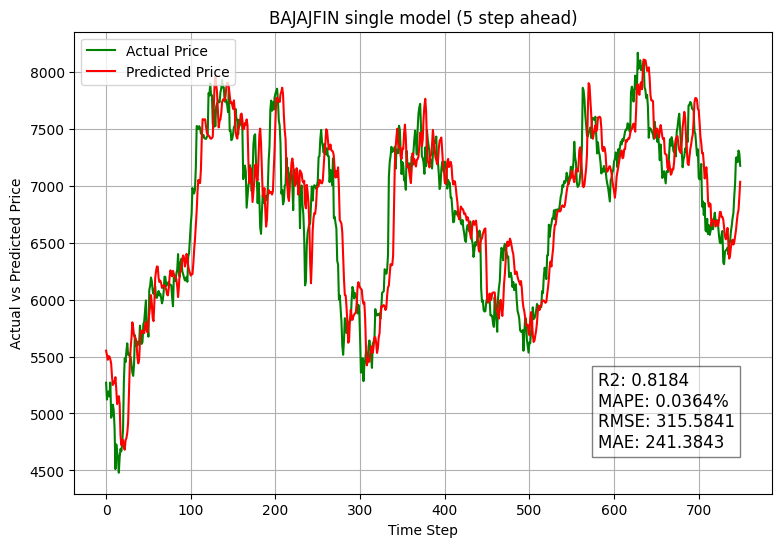

In [6]:
plt.figure(figsize=(9, 6))
plt.plot(y_test_actual_LSTM, color='green', label=['Actual Price'])
plt.plot(predictions_LSTM, color='red', label=['Predicted Price'])
plt.legend(['Actual Price', 'Predicted Price'], loc='upper left')

plt.text(0.75, 0.1, f'R2: {r2:.4f}\nMAPE: {mape:.4f}%\nRMSE: {rmse:.4f}\nMAE: {mae:.4f}', 
         fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.5),
         transform=plt.gca().transAxes)

plt.grid(True)
plt.title('BAJAJFIN single model (5 step ahead)')
plt.xlabel('Time Step')
plt.ylabel('Actual vs Predicted Price')
plt.savefig('bajajfin_5sa-1l.png', dpi=600)  # Saves the plot as a PNG file
plt.show()

In [7]:
model_lstm.predict(X_train)

predictions_train_lstm = model_lstm.predict(X_train)
predictions_train_LSTM = scaler.inverse_transform(predictions_train_lstm)
y_train_actual_LSTM = scaler.inverse_transform(y_train.reshape(-1, 1))

r2=r2_score(y_train_actual_LSTM, predictions_train_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_train_actual_LSTM, predictions_train_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_train_actual_LSTM, predictions_train_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_train, predictions_train_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae_n=mean_absolute_error(y_train, predictions_train_lstm)
print(f"MAE_normalizeddata: {mae_n:.4f}")

mae=mean_absolute_error(y_train_actual_LSTM, predictions_train_LSTM)
print(f"MAE: {mae:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
R2: 0.9923
MAPE: 0.1358
RMSE: 123.7901
RMSE_normalizeddata: 0.0152
MAE_normalizeddata: 0.0072
MAE: 58.9452


In [25]:
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(412, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model_lstm.add(tf.keras.layers.Dense(1))
model_lstm.compile(optimizer=Nadam(learning_rate=0.001), loss='mse')
model_lstm.fit(X_train, y_train, epochs=200, batch_size=39, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='loss', patience=5)])

predictions_lstm = model_lstm.predict(X_test)
predictions_LSTM = scaler.inverse_transform(predictions_lstm)
y_test_actual_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))

r2=r2_score(y_test_actual_LSTM, predictions_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_test_actual_LSTM, predictions_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_test, predictions_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae=mean_absolute_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAE: {mae:.4f}")

Epoch 1/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 73s 127ms/step - loss: 0.0114 - val_loss: 0.0022
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 3.4519e-04 - val_loss: 0.0022
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - loss: 2.7172e-04 - val_loss: 0.0021
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 2.9447e-04 - val_loss: 0.0022
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 2.6533e-04 - val_loss: 0.0026
Epoch 6/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 2.6523e-04 - val_loss: 0.0023
Epoch 7/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 2.8576e-04 - val_loss: 0.0020
Epoch 8/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 2.8535e-04 - val_loss: 0.0023
Epoch 9/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 2.9486e-04 - val_loss: 0.0020
Epoch 10/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 2.4334e-04 - val_loss: 0.0028
Epoch 11/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 2.6559e-04 - val_loss: 0.0019
Epoch 12/2

In [26]:
model_lstm.save('model_lstm_bajajfin5_1.keras')

In [27]:
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(412, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model_lstm.add(tf.keras.layers.Dense(1))
model_lstm.compile(optimizer=Nadam(learning_rate=0.001), loss='mse')
model_lstm.fit(X_train, y_train, epochs=200, batch_size=39, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='loss', patience=5)])

predictions_lstm = model_lstm.predict(X_test)
predictions_LSTM = scaler.inverse_transform(predictions_lstm)
y_test_actual_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))

r2=r2_score(y_test_actual_LSTM, predictions_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_test_actual_LSTM, predictions_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_test, predictions_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae=mean_absolute_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAE: {mae:.4f}")

Epoch 1/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 42s 161ms/step - loss: 0.0100 - val_loss: 0.0023
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 2.9441e-04 - val_loss: 0.0035
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 2.9311e-04 - val_loss: 0.0021
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 2.5583e-04 - val_loss: 0.0027
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 3.2347e-04 - val_loss: 0.0021
Epoch 6/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 2.6500e-04 - val_loss: 0.0032
Epoch 7/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 3.0905e-04 - val_loss: 0.0026
Epoch 8/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 3.0193e-04 - val_loss: 0.0027
Epoch 9/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 2.7375e-04 - val_loss: 0.0033
Epoch 10/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 2.6483e-04 - val_loss: 0.0021
Epoch 11/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 3.3897e-04 - val_loss: 0.0020
Epoch 12/2

In [28]:
model_lstm.save('model_lstm_bajajfin5_2.keras')

In [29]:
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(412, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model_lstm.add(tf.keras.layers.Dense(1))
model_lstm.compile(optimizer=Nadam(learning_rate=0.001), loss='mse')
model_lstm.fit(X_train, y_train, epochs=200, batch_size=39, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='loss', patience=5)])

predictions_lstm = model_lstm.predict(X_test)
predictions_LSTM = scaler.inverse_transform(predictions_lstm)
y_test_actual_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))

r2=r2_score(y_test_actual_LSTM, predictions_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_test_actual_LSTM, predictions_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_test, predictions_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae=mean_absolute_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAE: {mae:.4f}")

Epoch 1/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 32s 110ms/step - loss: 0.0116 - val_loss: 0.0021
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - loss: 3.3059e-04 - val_loss: 0.0021
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 3.6522e-04 - val_loss: 0.0024
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 3.3927e-04 - val_loss: 0.0021
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 3.6330e-04 - val_loss: 0.0031
Epoch 6/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 2.6160e-04 - val_loss: 0.0030
Epoch 7/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 3.0779e-04 - val_loss: 0.0026
Epoch 8/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 3.3128e-04 - val_loss: 0.0024
Epoch 9/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 2.7149e-04 - val_loss: 0.0027
Epoch 10/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 2.6236e-04 - val_loss: 0.0026
Epoch 11/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 2.6448e-04 - val_loss: 0.0023
24/24 ━━━━

In [30]:
model_lstm.save('model_lstm_bajajfin5_3.keras')

In [31]:
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(412, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model_lstm.add(tf.keras.layers.Dense(1))
model_lstm.compile(optimizer=Nadam(learning_rate=0.001), loss='mse')
model_lstm.fit(X_train, y_train, epochs=200, batch_size=39, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='loss', patience=5)])

predictions_lstm = model_lstm.predict(X_test)
predictions_LSTM = scaler.inverse_transform(predictions_lstm)
y_test_actual_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))

r2=r2_score(y_test_actual_LSTM, predictions_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_test_actual_LSTM, predictions_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_test, predictions_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae=mean_absolute_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAE: {mae:.4f}")

Epoch 1/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 17s 59ms/step - loss: 0.0127 - val_loss: 0.0024
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 3.4247e-04 - val_loss: 0.0022
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 2.4406e-04 - val_loss: 0.0020
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 2.7677e-04 - val_loss: 0.0021
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 2.8219e-04 - val_loss: 0.0020
Epoch 6/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 2.5735e-04 - val_loss: 0.0022
Epoch 7/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 3.2100e-04 - val_loss: 0.0028
Epoch 8/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 2.7290e-04 - val_loss: 0.0026
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step
R2: 0.7168
MAPE: 0.0459
RMSE: 394.0922
RMSE_normalizeddata: 0.0483
MAE: 308.4610


In [32]:
model_lstm.save('model_lstm_bajajfin5_4.keras')

In [33]:
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(412, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model_lstm.add(tf.keras.layers.Dense(1))
model_lstm.compile(optimizer=Nadam(learning_rate=0.001), loss='mse')
model_lstm.fit(X_train, y_train, epochs=200, batch_size=39, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='loss', patience=5)])

predictions_lstm = model_lstm.predict(X_test)
predictions_LSTM = scaler.inverse_transform(predictions_lstm)
y_test_actual_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))

r2=r2_score(y_test_actual_LSTM, predictions_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_test_actual_LSTM, predictions_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_test, predictions_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae=mean_absolute_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAE: {mae:.4f}")

Epoch 1/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 26s 55ms/step - loss: 0.0118 - val_loss: 0.0023
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 2.9307e-04 - val_loss: 0.0020
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 3.1297e-04 - val_loss: 0.0020
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 2.6098e-04 - val_loss: 0.0023
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 2.5823e-04 - val_loss: 0.0038
Epoch 6/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 2.7659e-04 - val_loss: 0.0020
Epoch 7/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 3.0089e-04 - val_loss: 0.0020
Epoch 8/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 2.8664e-04 - val_loss: 0.0026
Epoch 9/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 2.8382e-04 - val_loss: 0.0040
Epoch 10/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 2.5720e-04 - val_loss: 0.0020
Epoch 11/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 2.8139e-04 - val_loss: 0.0021
Epoch 12/20

In [34]:
model_lstm.save('model_lstm_bajajfin5_5.keras')

In [35]:
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(412, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model_lstm.add(tf.keras.layers.Dense(1))
model_lstm.compile(optimizer=Nadam(learning_rate=0.001), loss='mse')
model_lstm.fit(X_train, y_train, epochs=200, batch_size=39, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='loss', patience=5)])

predictions_lstm = model_lstm.predict(X_test)
predictions_LSTM = scaler.inverse_transform(predictions_lstm)
y_test_actual_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))

r2=r2_score(y_test_actual_LSTM, predictions_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_test_actual_LSTM, predictions_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_test, predictions_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae=mean_absolute_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAE: {mae:.4f}")

Epoch 1/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 36s 96ms/step - loss: 0.0126 - val_loss: 0.0021
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 3.3704e-04 - val_loss: 0.0037
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 2.9611e-04 - val_loss: 0.0020
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 2.8248e-04 - val_loss: 0.0029
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 3.1423e-04 - val_loss: 0.0021
Epoch 6/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 3.2749e-04 - val_loss: 0.0022
Epoch 7/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 3.2032e-04 - val_loss: 0.0021
Epoch 8/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 2.9060e-04 - val_loss: 0.0020
Epoch 9/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 2.7377e-04 - val_loss: 0.0026
Epoch 10/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 2.5023e-04 - val_loss: 0.0032
Epoch 11/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 2.8298e-04 - val_loss: 0.0021
Epoch 12/20

In [36]:
model_lstm.save('model_lstm_bajajfin5_6.keras')

In [37]:
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(412, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model_lstm.add(tf.keras.layers.Dense(1))
model_lstm.compile(optimizer=Nadam(learning_rate=0.001), loss='mse')
model_lstm.fit(X_train, y_train, epochs=200, batch_size=39, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='loss', patience=5)])

predictions_lstm = model_lstm.predict(X_test)
predictions_LSTM = scaler.inverse_transform(predictions_lstm)
y_test_actual_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))


r2=r2_score(y_test_actual_LSTM, predictions_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_test_actual_LSTM, predictions_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_test, predictions_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae=mean_absolute_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAE: {mae:.4f}")

Epoch 1/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 12s 58ms/step - loss: 0.0101 - val_loss: 0.0020
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 2.9290e-04 - val_loss: 0.0022
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 2.8685e-04 - val_loss: 0.0020
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 3.1166e-04 - val_loss: 0.0023
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 3.9086e-04 - val_loss: 0.0045
Epoch 6/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 3.3743e-04 - val_loss: 0.0020
Epoch 7/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 3.2530e-04 - val_loss: 0.0021
Epoch 8/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 2.3379e-04 - val_loss: 0.0034
Epoch 9/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 2.9714e-04 - val_loss: 0.0024
Epoch 10/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 2.9936e-04 - val_loss: 0.0021
Epoch 11/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 2.9467e-04 - val_loss: 0.0022
Epoch 12/20

In [38]:
model_lstm.save('model_lstm_bajajfin5_7.keras')

In [39]:
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(412, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model_lstm.add(tf.keras.layers.Dense(1))
model_lstm.compile(optimizer=Nadam(learning_rate=0.001), loss='mse')
model_lstm.fit(X_train, y_train, epochs=200, batch_size=39, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='loss', patience=5)])

predictions_lstm = model_lstm.predict(X_test)
predictions_LSTM = scaler.inverse_transform(predictions_lstm)
y_test_actual_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))

r2=r2_score(y_test_actual_LSTM, predictions_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_test_actual_LSTM, predictions_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_test, predictions_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae=mean_absolute_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAE: {mae:.4f}")

Epoch 1/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0119 - val_loss: 0.0021
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 2.8920e-04 - val_loss: 0.0043
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.5293e-04 - val_loss: 0.0091
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.0384e-04 - val_loss: 0.0028
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 2.5246e-04 - val_loss: 0.0021
Epoch 6/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.3234e-04 - val_loss: 0.0036
Epoch 7/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.8271e-04 - val_loss: 0.0021
Epoch 8/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 2.4322e-04 - val_loss: 0.0025
Epoch 9/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.7526e-04 - val_loss: 0.0021
Epoch 10/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.7310e-04 - val_loss: 0.0020
Epoch 11/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.8798e-04 - val_loss: 0.0020
Epoch 12/200

In [40]:
model_lstm.save('model_lstm_bajajfin5_8.keras')

In [41]:
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(412, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model_lstm.add(tf.keras.layers.Dense(1))
model_lstm.compile(optimizer=Nadam(learning_rate=0.001), loss='mse')
model_lstm.fit(X_train, y_train, epochs=200, batch_size=39, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='loss', patience=5)])

predictions_lstm = model_lstm.predict(X_test)
predictions_LSTM = scaler.inverse_transform(predictions_lstm)
y_test_actual_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))

r2=r2_score(y_test_actual_LSTM, predictions_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_test_actual_LSTM, predictions_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_test, predictions_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae=mean_absolute_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAE: {mae:.4f}")

Epoch 1/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0126 - val_loss: 0.0020
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 2.7948e-04 - val_loss: 0.0020
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.8137e-04 - val_loss: 0.0021
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.0274e-04 - val_loss: 0.0020
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 2.8368e-04 - val_loss: 0.0025
Epoch 6/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 2.5918e-04 - val_loss: 0.0023
Epoch 7/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.3141e-04 - val_loss: 0.0020
Epoch 8/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.9081e-04 - val_loss: 0.0034
Epoch 9/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 2.8282e-04 - val_loss: 0.0023
Epoch 10/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 2.4376e-04 - val_loss: 0.0021
Epoch 11/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 2.4138e-04 - val_loss: 0.0021
Epoch 12/200

In [42]:
model_lstm.save('model_lstm_bajajfin5_9.keras')

In [43]:
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(412, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model_lstm.add(tf.keras.layers.Dense(1))
model_lstm.compile(optimizer=Nadam(learning_rate=0.001), loss='mse')
model_lstm.fit(X_train, y_train, epochs=200, batch_size=39, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='loss', patience=5)])

predictions_lstm = model_lstm.predict(X_test)
predictions_LSTM = scaler.inverse_transform(predictions_lstm)
y_test_actual_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))

r2=r2_score(y_test_actual_LSTM, predictions_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_test_actual_LSTM, predictions_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_test, predictions_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae=mean_absolute_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAE: {mae:.4f}")

Epoch 1/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0138 - val_loss: 0.0023
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0616e-04 - val_loss: 0.0021
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 2.5672e-04 - val_loss: 0.0024
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 2.4463e-04 - val_loss: 0.0022
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6100e-04 - val_loss: 0.0021
Epoch 6/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.9370e-04 - val_loss: 0.0021
Epoch 7/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.8812e-04 - val_loss: 0.0021
Epoch 8/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.4521e-04 - val_loss: 0.0021
Epoch 9/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.0228e-04 - val_loss: 0.0024
Epoch 10/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.8600e-04 - val_loss: 0.0022
Epoch 11/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 2.9132e-04 - val_loss: 0.0024
Epoch 12/200

In [44]:
model_lstm.save('model_lstm_bajajfin5_10.keras')